<a href="https://colab.research.google.com/github/chengzh2008/fastbook/blob/main/basic_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


In [18]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_image, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_image.shape

(60000, 28, 28)

In [20]:
def showImage(image):
  plt.figure()
  plt.imshow(image)
  plt.grid(False)
  plt.colorbar()
  plt.show()

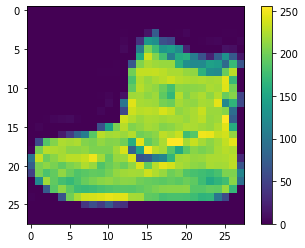

In [21]:
showImage(train_image[0])

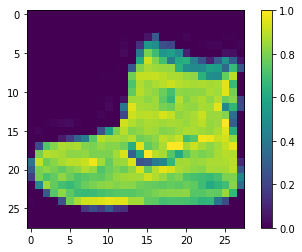

In [22]:
# scale the pixel values to 0 to 1
train_image, test_images = train_image / 255.0, test_images / 255.0
showImage(train_image[0])

In [23]:
def showImages(images, labels, startIndex, endIndex):
  plt.figure(figsize=(10, 10))
  for i in range(startIndex, endIndex):
    plt.subplot(5, 5, i - startIndex + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels[i]])
  plt.show()


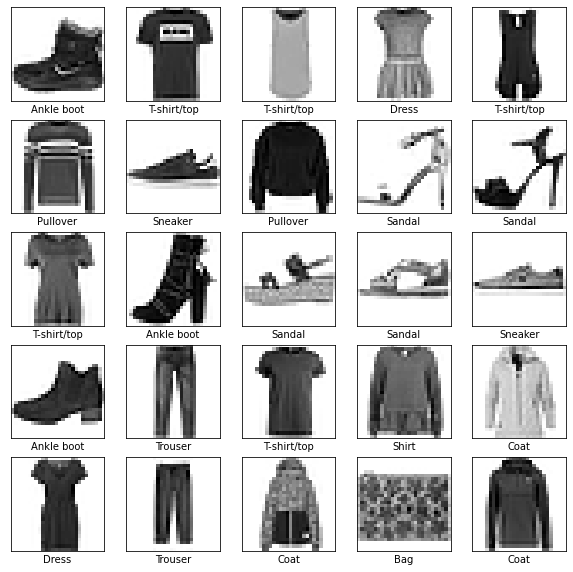

In [24]:
showImages(train_image, train_labels, 0, 25)

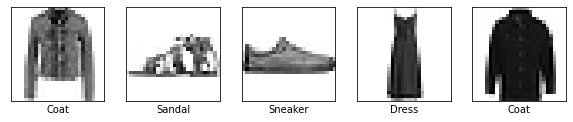

In [25]:
showImages(test_images, test_labels, 10, 15)

In [26]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [29]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [30]:
model.fit(train_image, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6215 - accuracy: 0.7834
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3840 - accuracy: 0.8611
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3376 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3092 - accuracy: 0.8873
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2956 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2803 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2651 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2554 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2464 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest loss, {test_loss}, Test accuracy: {test_acc}')

313/313 - 0s - loss: 0.3338 - accuracy: 0.8835

Test loss, 0.33382412791252136, Test accuracy: 0.8834999799728394


In [33]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [35]:
predictions = probability_model.predict(test_images)

In [36]:
np.argmax(predictions[0])

9

In [37]:
test_labels[0]

9

In [45]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color=color)

In [43]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [82]:
def plot_image_value_by_index(start_index, rows=1, cols=1, i=0, is_size=False):
  if not is_size: 
    plt.figure(figsize=(6, 3))
  plt.subplot(rows, 2 * cols, 2 * i + 1)
  plot_image(start_index, predictions[start_index], test_labels, test_images)
  plt.subplot(rows, 2 * cols, 2 * i + 2)
  plot_value_array(start_index, predictions[start_index], test_labels)
  if not is_size:
    plt.show()

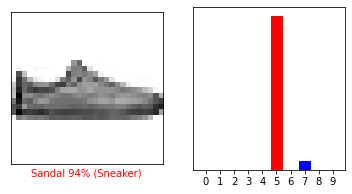

In [83]:
plot_image_value_by_index(12)

In [86]:
def plot_images_grid_by_index_rows_cols(index, rows=5, cols=3):
  plt.figure(figsize=(2 * 2 * cols, 2 * rows))
  num_images = rows * cols 
  for i in range(num_images):
    plot_image_value_by_index(i + index, rows, cols, i, is_size=True)
  plt.tight_layout()
  plt.show()


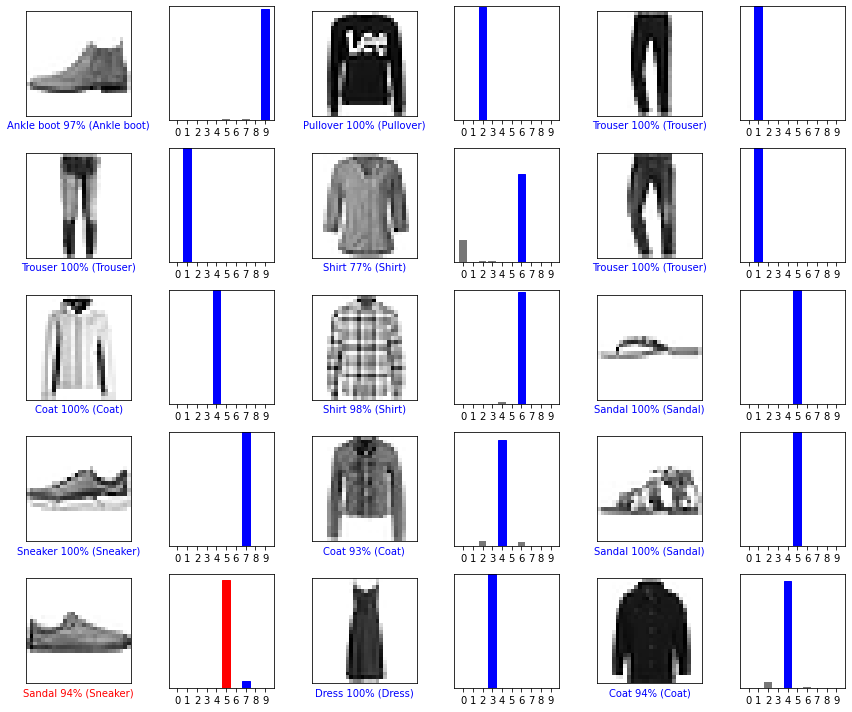

In [87]:
plot_images_grid_by_index_rows_cols(0)

In [91]:
img = test_images[1]
print(img.shape)

(28, 28)


In [92]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [93]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[4.0038108e-04 8.2409665e-15 9.9808502e-01 1.5873894e-09 1.3803744e-03
  4.8034721e-13 1.3419741e-04 7.1190059e-20 8.5962119e-11 8.0688223e-14]]


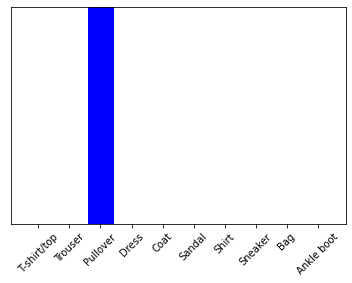

In [95]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [97]:
np.argmax(predictions_single[0])


2